In [ ]:
import numpy as np
import pandas as pd

n=200
df=pd.DataFrame({'код респондента':np.random.randint(1,np.int(0.33*n),size=n),
                 'дата опроса':np.random.choice(['2020-01-31','2021-01-31','2022-02-03','2019-06-06'],size=n),
    'пол':np.random.choice(['муж','жен'],size=n,p=(0.35,0.65)),
'образование':np.random.choice(['высшее','незаконченное высшее', 
                                'среднее','среднее специальное'],p=(0.1,0.1,0.4,0.4),size=n),
                 'социальный статус':np.random.choice(['холост/незамужем','женат/замужем', 
                                'вдовец/вдова','разведен/разведена'],p=(0.45,0.05,0.05,0.45),size=n),
'возраст':np.rint(np.random.normal(45,15,size=n)),
'рост':list(np.rint(np.random.normal(160,20,size=int(n*0.9))))+
      list(np.rint(np.random.normal(180,20,size=n-int(n*0.9))))
      })
df['вес']=df['рост']-(100+(df['рост']-100)/20)+np.rint(np.random.normal(10,2,size=n))
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


код респондента дата опроса  пол           образование  \
0                 38  2021-01-31  жен               среднее   
1                  2  2021-01-31  жен   среднее специальное   
2                 21  2021-01-31  муж  незаконченное высшее   
3                 40  2022-02-03  муж   среднее специальное   
4                 55  2021-01-31  муж  незаконченное высшее   
..               ...         ...  ...                   ...   
195               36  2019-06-06  жен                высшее   
196               46  2021-01-31  жен               среднее   
197               44  2019-06-06  жен               среднее   
198               24  2021-01-31  жен   среднее специальное   
199               17  2022-02-03  муж                высшее   

      социальный статус  возраст   рост     вес  
0    разведен/разведена     43.0  148.0   55.60  
1      холост/незамужем     26.0  173.0   81.35  
2         женат/замужем     73.0  154.0   59.30  
3    разведен/разведена     64.0  180.0   81.00  
4      холост/незамужем     41.0  140.0   46.00  
..                  ...      ...    ...     ...  
195    холост/незамужем     46.0  145.0   53.75  
196    холост/незамужем     38.0  169.0   73.55  
197        вдовец/вдова     36.0  165.0   70.75  
198  разведен/разведена     45.0  233.0  136.35  
199    холост/незамужем     40.0  171.0   76.45  

[200 rows x 8 columns]

По данным выше, создать следующие визуализации:
1. С помощью matplotlib создать гистограмму распределения образования
2. С помощью matplotlib создать график эмпирической функции распределения веса
3. С помощью matplotlib создать график зависимости веса от возраста, добавить на него линию тренда (линейной регрессии)
4. С помощью seaborn создать гистограмму распределения социального статуса, разделенную по образованию
5. С помощью seaborn создать тепловую карту, с осями -  социальный статус и образование, где в качестве значений используется средний возраст
6. С помощью plotly создать диаграмму -водопад (Waterfall), с накопленным весом (суммой) внутри категорий образования
7. С помощью plotly создать интерактивную тепловую карту, с осями -  социальный статус и образование, где в качестве значений используется средний вес
8. С помощью plotly создать дэшборд с распределение по полу и возрасту респондентов
9. Нарисовать в bokeh пай-чарт по доле разных видов социального статуса в выборке.
10. Нарисовать в bokeh домик, с треугольной крышей и окном, , стены сделать белого цвета, крышу - красного. (делается без данных выборки)

# matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rc('font', size=15)

## 1. Гистограмма распределения образования

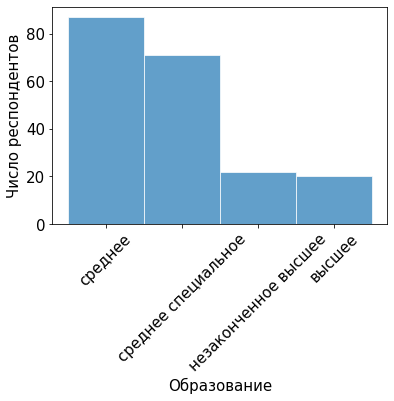

In [ ]:
res = plt.hist(df['образование'], bins = len(df['образование'].unique()), ec='white', alpha=0.7)

xticks = (np.array(res[1])+(res[1][1]-res[1][0])/2)[:-1]
plt.xticks(xticks, rotation=45)

plt.xlabel('Образование')
plt.ylabel('Число респондентов')
None

## 2. Эмпирическая функция распределения веса

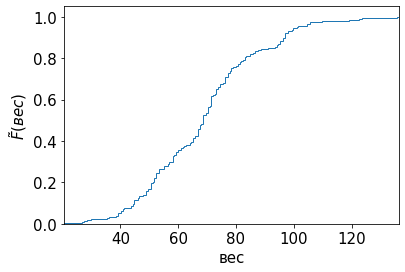

In [ ]:
res = plt.hist(df['вес'], cumulative=1, histtype='step', density=True, bins=np.count_nonzero(df['вес']))

plt.xlim(res[1][0], res[1][-1])

plt.xlabel('вес')
plt.ylabel(r'$\tildeF(вес)$')
None

## 3. График зависимости веса от возраста с линией тренда (линейной регрессии)

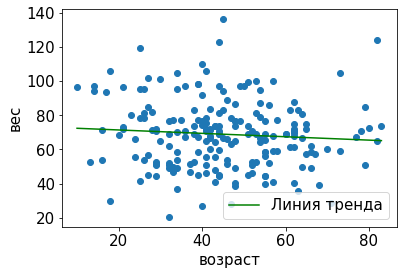

In [ ]:
plt.scatter(df['возраст'], df['вес'])
plt.xlabel('возраст')
plt.ylabel('вес')

coefs = np.polyfit(df['возраст'], df['вес'], 1)
weight_lim = [df['возраст'].min(), df['возраст'].max()]
trend = [coefs[0]*x+coefs[1] for x in weight_lim]

plt.plot(weight_lim, trend, color='green', label='Линия тренда')

plt.legend(loc='lower right')

# seaborn

In [ ]:
import seaborn as sns

## 4. Гистограмма распределения социального статуса, разделенная по образованию

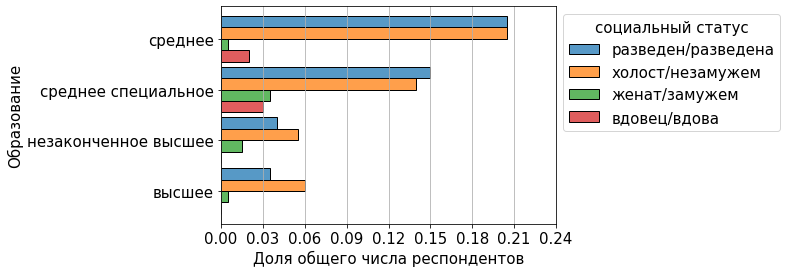

In [ ]:
ax = sns.histplot(data=df, y='образование', hue='социальный статус', multiple="dodge", shrink=.9, stat='density')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Доля общего числа респондентов', ylabel = 'Образование', xticks=np.arange(0,0.25,0.03))
ax.grid(axis='x')
None

## 5. Тепловая карта с осями - социальный статус и образование, в качестве значений - средний возраст

In [ ]:
pd_for_pivot_t = pd.DataFrame(df.groupby(['социальный статус','образование'])['возраст'].mean()).reset_index()
pivot_t = pd.pivot_table(data=pd_for_pivot_t,index=['образование'],columns=['социальный статус'],values='возраст',fill_value=None)

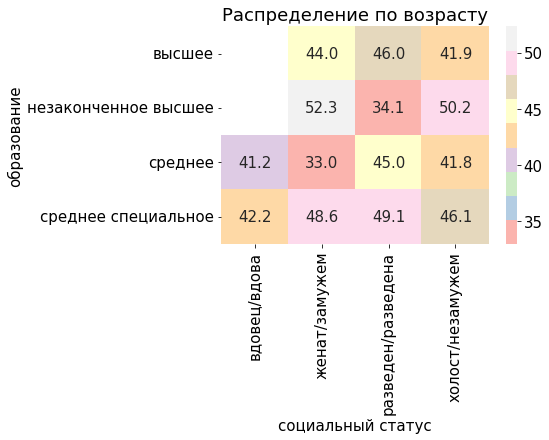

In [ ]:
ax = sns.heatmap(pivot_t,annot=True, fmt=".1f", cmap='Pastel1')
ax.set_title('Распределение по возрасту')
None

# plotly

In [ ]:
from plotly import express as px

In [ ]:
import plotly.graph_objects as go

## 6. Диаграмма-водопад (Waterfall), с накопленным весом (суммой) внутри категорий образования

In [ ]:
fig1  = go.Figure()

hrz = df['образование'].unique()
hrz = np.append(hrz, 'всего')

vrt = df.groupby('образование')['вес'].sum()
vrt['всего'] = vrt.sum()

text = df.groupby('образование')['вес'].count()
text['всего'] = text.sum()
text = text.apply(lambda x: '+ {0} чел.'.format(x))

fig1.add_trace(go.Waterfall(                 
                  x = hrz, y = vrt,
                  base = 0,
                  text=text, textposition='inside',
                  measure = [ "relative","relative",    
                              "relative", "relative",
                              "total" ]                        
                ))   
# fig1.update_layout(title_text = "Накопление веса")
fig1.update_yaxes(title='Накопленный вес')
fig1.update_xaxes(title='Образование')                         
fig1.show()

## 7. Интерактивная тепловая карта, с осями - социальный статус и образование, значения - средний вес

In [ ]:
fig2 = px.imshow(pivot_t, text_auto=True, title='Распределение возраста')
fig2.show()

## 8. Дэшборд с распределением по полу и возрасту респондентов

In [ ]:
!python -m pip install -q dash
!pip install -q flask flask-ngrok

     |████████████████████████████████| 9.8 MB 4.3 MB/s 
     |████████████████████████████████| 357 kB 44.9 MB/s 


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
!tar -xf /content/ngrok-stable-linux-amd64.tgz
!/content/ngrok authtoken 22eF5wCFDMttWLQNx3MWCmaNUWc_6awnMPgmJAGgYoZxQs6RM

--2022-05-29 03:30:16--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13770165 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.13M  6.06MB/s    in 2.2s    

2022-05-29 03:30:19 (6.06 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13770165/13770165]

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
get_ipython().system_raw('./ngrok http 8050 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

fig3 = px.histogram(df, x='возраст', color='пол', color_discrete_sequence=['lightpink', 'lightskyblue'], marginal='box')
fig3['layout']['yaxis'].update(title_text='Количество респондентов') 
fig3.show()

In [ ]:
%%writefile my_app1.py
import dash
from dash import html,dcc

import pandas as pd
import numpy as np
import plotly.express as px

# data
n=200
df=pd.DataFrame({'код респондента':np.random.randint(1,np.int(0.33*n),size=n),
                 'дата опроса':np.random.choice(['2020-01-31','2021-01-31','2022-02-03','2019-06-06'],size=n),
    'пол':np.random.choice(['муж','жен'],size=n,p=(0.35,0.65)),
'образование':np.random.choice(['высшее','незаконченное высшее', 
                                'среднее','среднее специальное'],p=(0.1,0.1,0.4,0.4),size=n),
                 'социальный статус':np.random.choice(['холост/незамужем','женат/замужем', 
                                'вдовец/вдова','разведен/разведена'],p=(0.45,0.05,0.05,0.45),size=n),
'возраст':np.rint(np.random.normal(45,15,size=n)),
'рост':list(np.rint(np.random.normal(160,20,size=int(n*0.9))))+
      list(np.rint(np.random.normal(180,20,size=n-int(n*0.9))))
      })
df['вес']=df['рост']-(100+(df['рост']-100)/20)+np.rint(np.random.normal(10,2,size=n))

# graphs
fig3 = px.histogram(df, x='возраст', color='пол', color_discrete_sequence=['lightpink', 'lightskyblue'], marginal='box')
fig3['layout']['yaxis'].update(title_text='Количество респондентов') 

app = dash.Dash(__name__)

app.layout = html.Div(children=[
    html.H1(children='Опрос'),
    html.Div(children='Распределение по полу и возрасту респондентов'),

    dcc.Graph(
        id='hist01',
        figure=fig3)])

if __name__ == '__main__':
    app.run_server(debug=True)

Writing my_app1.py


In [ ]:
# !python my_app1.py

# bokeh

In [ ]:
from bokeh.plotting import output_notebook, Figure, show
from bokeh.models import HoverTool

## 9. Пай-чарт по доле разных видов социального статуса в выборке

In [ ]:
grouped_by_status = df.groupby('социальный статус')['пол'].count().reset_index()
grouped_by_status = grouped_by_status.rename({'пол':'количество'}, axis=1)

In [ ]:
status_portions = [x/np.array(grouped_by_status['количество'].values).sum() for x in grouped_by_status['количество'].values]
status_degrees = np.array(status_portions)*360
start_edges = [0]
prev = 0
for x in status_degrees:
  start_edges.append(x+prev)
  prev = start_edges[len(start_edges)-1]
end_edges = start_edges[1::]
start_edges = start_edges[:-1]

In [ ]:
grouped_by_status['start_edges'] = start_edges
grouped_by_status['end_edges'] = end_edges
grouped_by_status['color'] = ['lightblue', 'blanchedalmond', 'lavender', 'lightcoral']
grouped_by_status = grouped_by_status.rename({'социальный статус':'status', 'количество':'size'},axis=1)
grouped_by_status

status  size  start_edges  end_edges           color
0        вдовец/вдова    10          0.0       18.0       lightblue
1       женат/замужем    12         18.0       39.6  blanchedalmond
2  разведен/разведена    86         39.6      194.4        lavender
3    холост/незамужем    92        194.4      360.0      lightcoral

In [ ]:
output_notebook()
fig4 = Figure(tools='hover', tooltips='@size респондентов @status', width=350, height=350, title='Социальные статусы')
fig4.wedge(x=0,y=0,radius=1,start_angle_units='deg',end_angle_units='deg',start_angle='start_edges', end_angle='end_edges', 
          line_dash='dotted',line_color = 'black', color='color', source=grouped_by_status)
show(fig4)

## 10. Домик, с треугольной крышей и окном, стенЫ - белого цвета, крыша - красного

In [ ]:
output_notebook()
fig4 = Figure(width=500,height=500, )
# front wall
fig4.quad(left=-5, right=5, top=5, bottom=-5, line_color='black', color='white')
# side wall
fig4.patch([5, 9, 9, 5],[-5, 0, 10, 5], line_color='black', color='white')
# front roof
fig4.patch([-7, -1, 6], [5, 9, 5], line_color='black', color='red')
# side roof
fig4.patch([-1,6,11,5], [9,5,9,13], line_color='black', color='red')
# side window
fig4.patch([6, 6, 8.5, 8.5], [0, 4, 6.3, 2.3], line_color='black', color='lightblue')
fig4.line([7.25, 7.25],[1.25,5.2],color='black')
fig4.line([6, 8.5],[2,4.1],color='black')
# door
fig4.quad(left=-3, right=3, top=2, bottom=-5, line_color='black', color='brown')
# door handle
fig4.arc(x=-3, y=-1.5, radius=1, start_angle=-90, start_angle_units='grad', end_angle=90, end_angle_units='grad', color='black')

show(fig4)